In [60]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
import keras 
import os
import cv2
model = keras.models.load_model("models/1_CNN_Model_From_Scratch.h5")
model2 = keras.models.load_model("models/2_VGG16_model.h5")
model3 = keras.models.load_model("models/3_VGG19_model.h5")

In [61]:
dir = "../../Data/Splitted_Images/test"

x_test=[]

for folder in os.listdir(dir):
    sub_path=dir+"/"+folder

    for img in os.listdir(sub_path)[:10]:
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        x_test.append(img_arr)

test_x=np.array(x_test)
test_x=test_x/255.0

In [62]:
predictions = model.predict(test_x) 

In [118]:
def prediction_pie(predictions):
    X_data = []
    for folder in os.listdir(dir):
            sub_path=dir+"/"+folder

            for img in os.listdir(sub_path)[:10]:
                image_path=sub_path+"/"+img
                img_raw = image.load_img(image_path, target_size = (170, 256))
                X_data.append(img_raw)
                
    for i in range(50):
        plt.subplot(1, 2, 1) # row 1, col 2 index 1
        plt.title("drawing")
        plt.imshow(X_data[i])
        plt.axis('off')
        plt.subplot(1, 2, 2) # index 2
        display_labels=['bee','butterfly','cat','dog','elephant']
        colors = ['yellow','red','orange','blue','gray']
        percent = 100.0*predictions[i]/predictions[i].sum()

        patches, texts = plt.pie(predictions[i], colors=colors, startangle=90, radius=1.2)
        labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(display_labels, percent)]

        sort_legend = True
        if sort_legend:
                patches, labels, dummy =  zip(*sorted(zip(patches, labels, predictions[i]),
                                                    key=lambda x: x[2],
                                                    reverse=True))


        plt.legend(patches, labels, loc='center', bbox_to_anchor=(0.5, -0.2), fontsize=12)
        plt.show()

C:\Users\Brune\AppData\Local\Temp/ipykernel_35368/3760905760.py:21: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  patches, texts = plt.pie(predictions[i], colors=colors, startangle=90, radius=1.2)


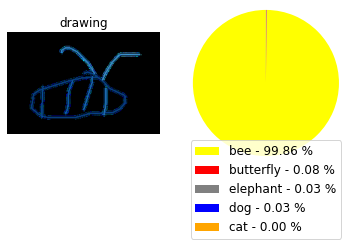

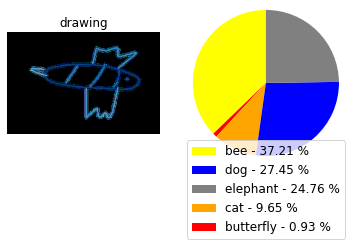

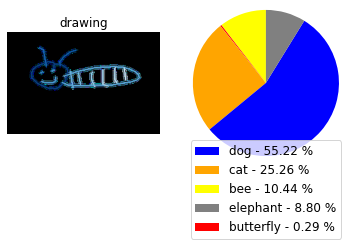

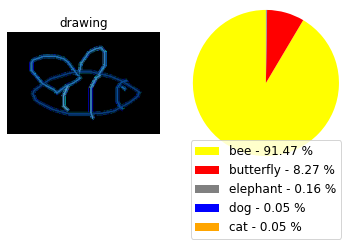

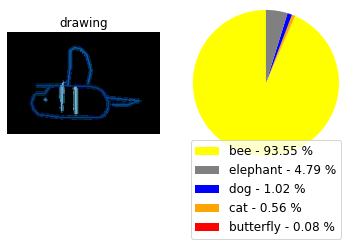

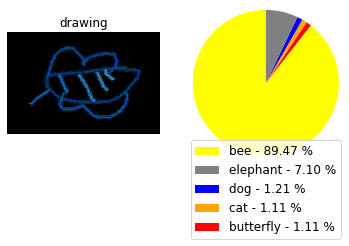

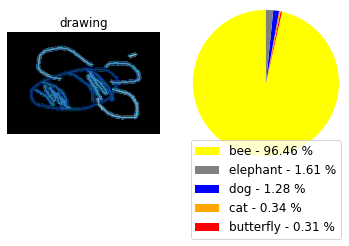

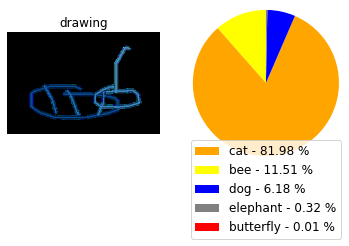

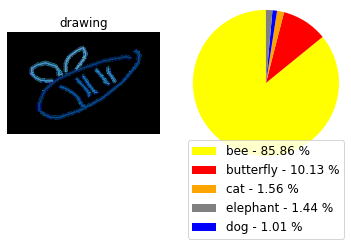

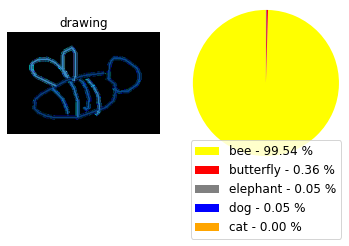

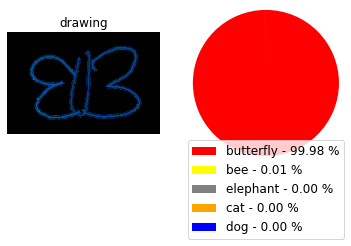

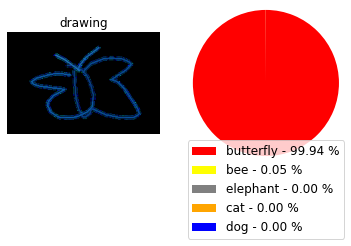

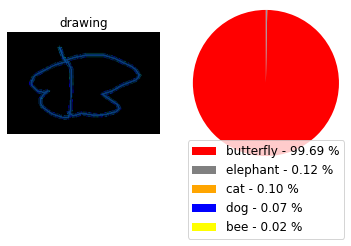

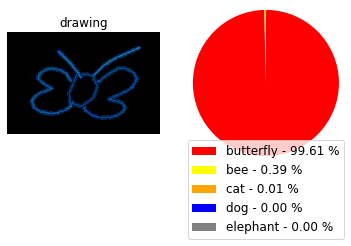

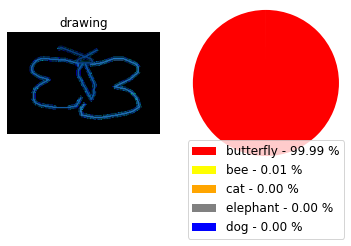

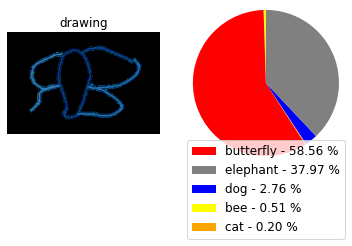

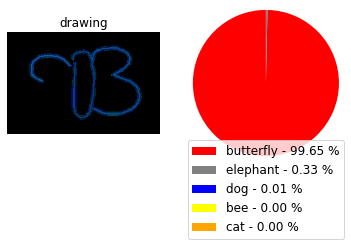

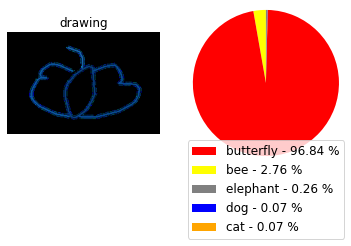

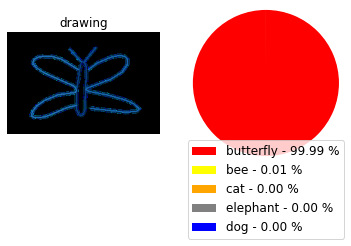

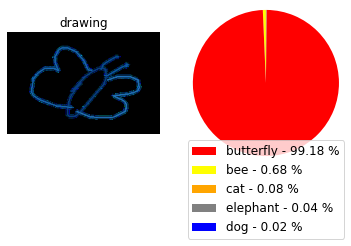

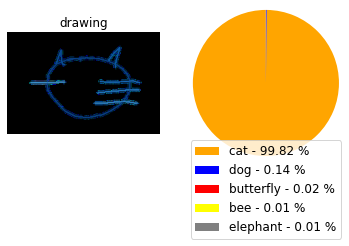

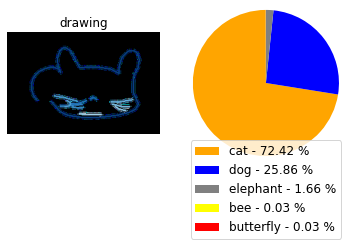

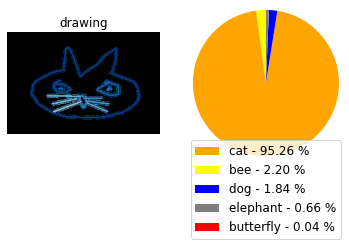

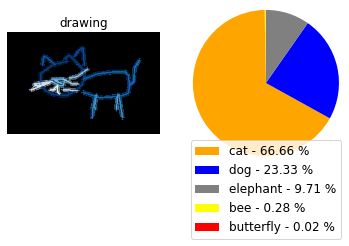

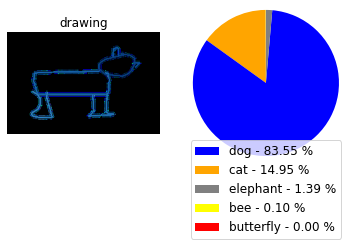

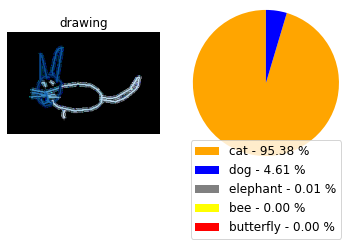

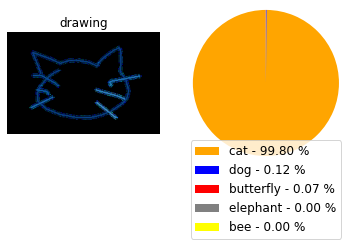

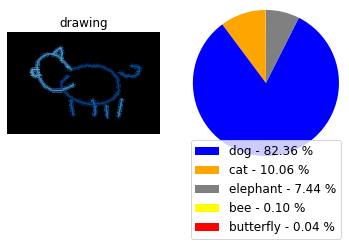

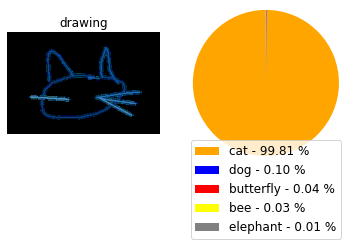

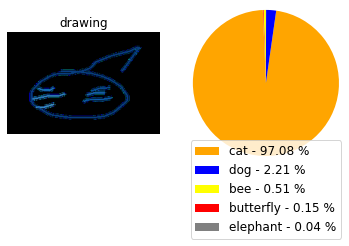

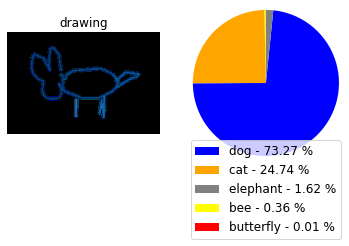

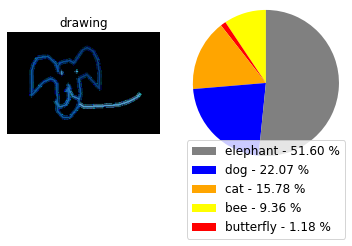

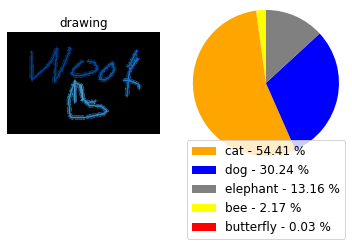

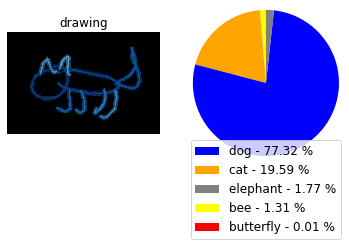

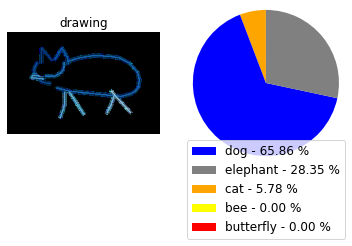

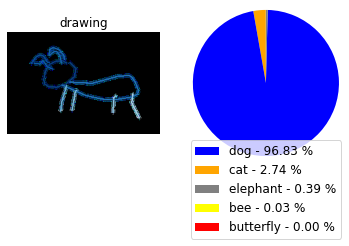

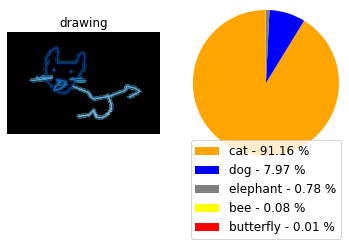

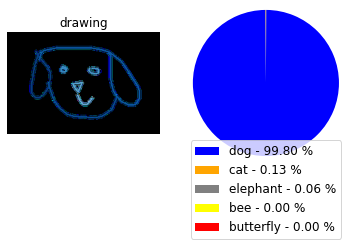

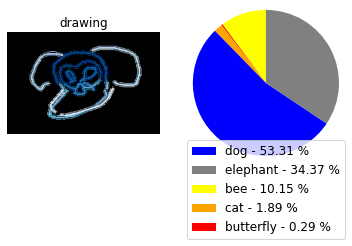

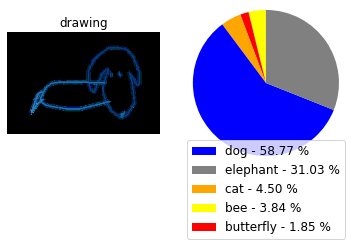

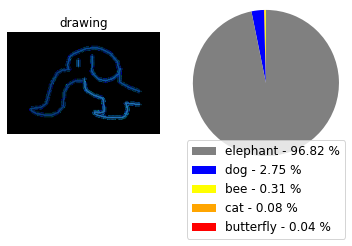

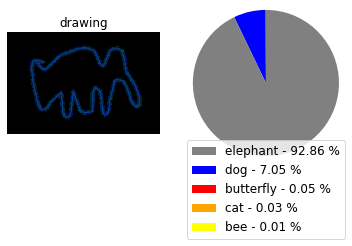

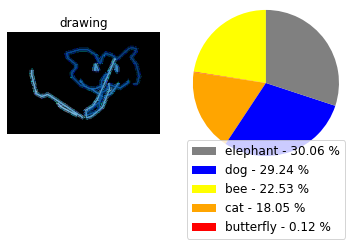

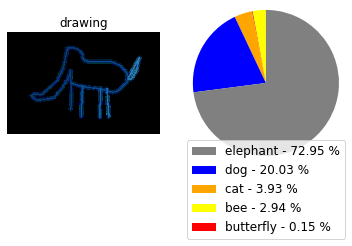

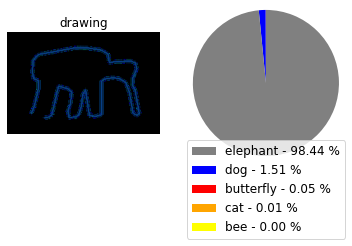

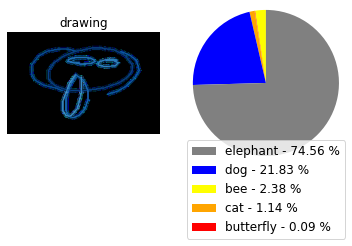

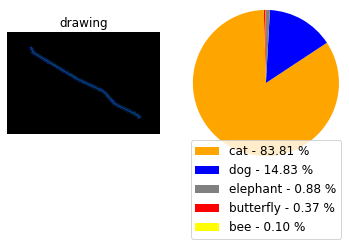

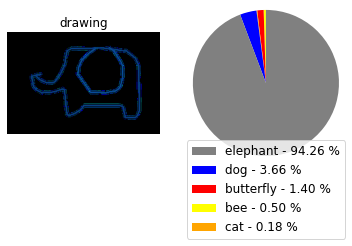

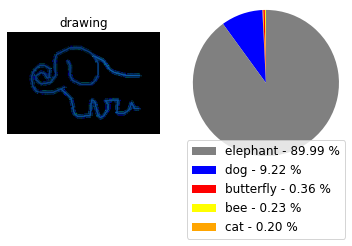

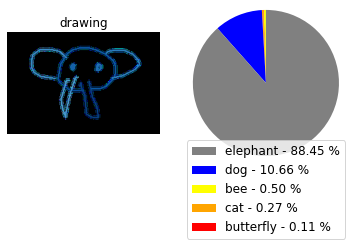

In [119]:
prediction_pie(predictions)